In [1]:
pip install bifold

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


density/interaction               L          norm        renorm      vol2        vol4            msr
──────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────total     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_m3y_reid_zr          0          None        1.000   -59536.370  -982867.456       16.509 
───────direct    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_direct               0          None        1.000   -23281.699  -486747.684       20.907 
rho_p    : f_2prm_gaussian        0          None        1.000        4.000        8.543        2.136 
rho_t    : f_2prm_fermi           0          None        1.000       39.908      461.090       11.554 
vnn      : f_yukawa               0          None        1.000     1570.558      588.970        0.375 
vnn      : f_yukawa               0          None

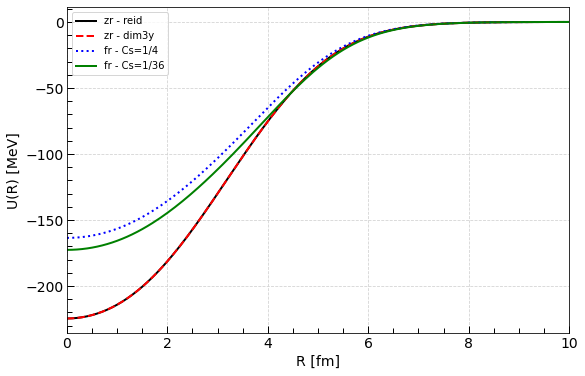

In [2]:
from bifold import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.05)  # fm^-1

e_lab = 141.7
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)

u1    = u_m3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q)
u2_zr = u_xdm3yn_zr(e_lab, a_proj, rho_p, rho_t, r, q, dd_name='dim3y', vnn_name='reid')

rc = 1.4 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
u_coul = u_coul_ucs(r, rc, z_proj, z_targ)
u2_fr1 = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, Cs=1/4, dd_name='dim3y', vnn_name='reid')
u2_fr2 = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, dd_name='dim3y', vnn_name='reid')


print_all(u1, r, q)
print_all(u2_zr, r, q)
print_all(u2_fr1, r, q)
print_all(u2_fr2, r, q)
plot_potentials([u1, u2_zr, u2_fr1, u2_fr2], r, linestyles=['solid', 'dashed', 'dotted'],
                legends=['zr - reid', 'zr - dim3y', 'fr - Cs=1/4', 'fr - Cs=1/36'])